In [2]:
pip install tensorflow matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cache

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tensorflow]
   ------------------------------------- -- 15/16 [tens

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
# ReLU activation
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return x > 0

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


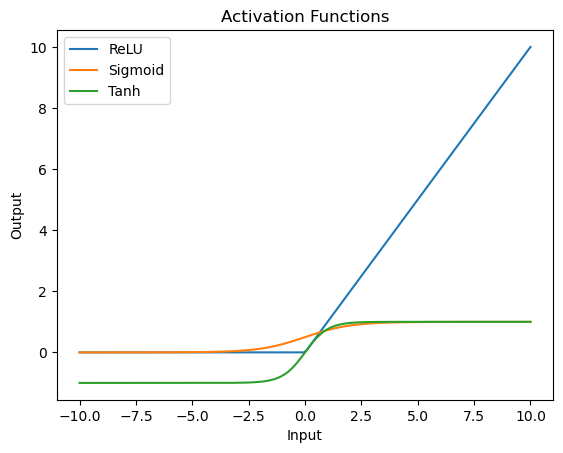

In [23]:
# create input range
x = np.linspace(-10, 10, 200)

# activation functions
relu_vals = np.maximum(0, x)
sigmoid_vals = 1 / (1 + np.exp(-x))
tanh_vals = np.tanh(x)

plt.figure()
plt.plot(x, relu_vals, label="ReLU")
plt.plot(x, sigmoid_vals, label="Sigmoid")
plt.plot(x, tanh_vals, label="Tanh")

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()


In [3]:
# input data
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# output labels
y = np.array([[0],[1],[1],[0]])


In [18]:
np.random.seed(1)  # for same result every run

input_neurons = 2
hidden_neurons = 4
output_neurons = 1

# weights and bias
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

loss_history = []



In [11]:
# forward pass

hidden_input = np.dot(X, W1) + b1
hidden_output = relu(hidden_input)

final_input = np.dot(hidden_output, W2) + b2
predicted_output = sigmoid(final_input)


In [12]:
loss = np.mean((y - predicted_output) ** 2)
print("Loss:", loss)


Loss: 0.3139264408596186


In [13]:
# error at output layer
error_output = 2 * (predicted_output - y)
d_output = error_output * sigmoid_derivative(predicted_output)

# error at hidden layer
error_hidden = np.dot(d_output, W2.T)
d_hidden = error_hidden * relu_derivative(hidden_input)

# gradients
W2_grad = np.dot(hidden_output.T, d_output)
b2_grad = np.sum(d_output, axis=0, keepdims=True)

W1_grad = np.dot(X.T, d_hidden)
b1_grad = np.sum(d_hidden, axis=0, keepdims=True)


In [14]:
learning_rate = 0.1

W1 -= learning_rate * W1_grad
b1 -= learning_rate * b1_grad

W2 -= learning_rate * W2_grad
b2 -= learning_rate * b2_grad


In [20]:
learning_rate = 0.1
epochs = 10000

for i in range(epochs):

    # ----- Forward Propagation -----
    hidden_input = np.dot(X, W1) + b1
    hidden_output = relu(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    predicted_output = sigmoid(final_input)

    # ----- Loss -----
    loss = np.mean((y - predicted_output) ** 2)
    loss_history.append(loss)

    # ----- Backpropagation -----
    error_output = 2 * (predicted_output - y)
    d_output = error_output * sigmoid_derivative(predicted_output)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * relu_derivative(hidden_input)

    W2_grad = np.dot(hidden_output.T, d_output)
    b2_grad = np.sum(d_output, axis=0, keepdims=True)

    W1_grad = np.dot(X.T, d_hidden)
    b1_grad = np.sum(d_hidden, axis=0, keepdims=True)

    # ----- Update -----
    W1 -= learning_rate * W1_grad
    b1 -= learning_rate * b1_grad
    W2 -= learning_rate * W2_grad
    b2 -= learning_rate * b2_grad

    # print loss every 1000 epochs
    if i % 1000 == 0:
        print("Epoch:", i, "Loss:", loss)


Epoch: 0 Loss: 0.3139264408596186
Epoch: 1000 Loss: 0.0019345188177981878
Epoch: 2000 Loss: 0.0007490324625199627
Epoch: 3000 Loss: 0.0004529706593741667
Epoch: 4000 Loss: 0.0003214565926972095
Epoch: 5000 Loss: 0.00024807541435524814
Epoch: 6000 Loss: 0.00020133734786997146
Epoch: 7000 Loss: 0.00016911337837732283
Epoch: 8000 Loss: 0.00014557806458408227
Epoch: 9000 Loss: 0.00012768791762981702


In [24]:
def compute_loss_with_weight(w_value):
    # copy trained weights
    W1_temp = W1.copy()
    
    # change ONE weight slightly
    W1_temp[0,0] = w_value
    
    # forward pass
    hidden = np.maximum(0, np.dot(X, W1_temp) + b1)
    output = 1 / (1 + np.exp(-(np.dot(hidden, W2) + b2)))
    
    # loss
    return np.mean((y - output) ** 2)


In [25]:
weight_range = np.linspace(-3, 3, 200)
loss_values = []

for w in weight_range:
    loss_values.append(compute_loss_with_weight(w))


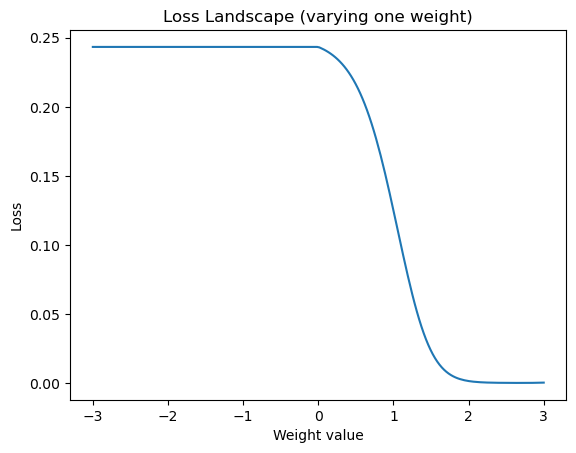

In [26]:
plt.figure()
plt.plot(weight_range, loss_values)

plt.title("Loss Landscape (varying one weight)")
plt.xlabel("Weight value")
plt.ylabel("Loss")
plt.show()


In [16]:
print("\nTraining completed!")
print("Final Loss:", loss)



Training completed!
Final Loss: 0.000113617560782976


In [17]:
print("\nPredictions after training:")
print(predicted_output)

print("\nRounded Predictions:")
print(predicted_output.round())



Predictions after training:
[[0.01355138]
 [0.9933832 ]
 [0.99341149]
 [0.01355138]]

Rounded Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


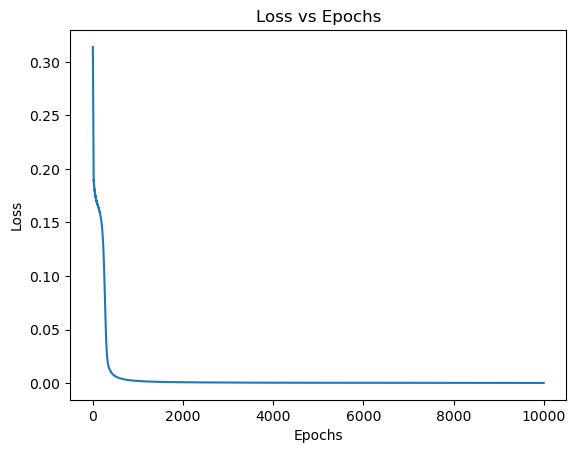

In [21]:
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
